# Creating observables

In [1]:
import pyobs
import numpy

import matplotlib.pyplot as plt
%matplotlib notebook

First we generate synthetic autocorrelated data, using the `acrand` module

In [2]:
N=5000 # number of configs
mu = 0.5 # central values
cov = (mu*0.5)**2 # error^2

# autocorrelation time
tau=4.0

data = pyobs.random.acrand(mu,cov,tau,N)

Then we create a new observable that we can inspect with the `peek` function.

In [3]:
obsA = pyobs.observable(description='Observable A')
obsA.create('EnsA',data)
obsA.peek()

Observable with shape = (1,)
 - description: Observable A
 - size: 218 KB
 - mean: [0.50207592]
 - Ensemble EnsA
    - Replica 0 with mask [0] and ncnfg 5000
         temporary additional memory required 0.076 MB



The first goal is to compute the error and check the autocorrelations. They should match $\tau=4$.

In [4]:
help(pyobs.observable.tauint)
obsA.tauint() # returns a dictionary with tauint ensemble by ensemble

Help on function tauint in module pyobs.core.ndobs:

tauint(self)
    Estimates the integrated autocorrelation time and its error for every
    ensemble, with the automatic windowing procedure.
    
    Notes:
       To be added in future versions: support for arbitrary values of Stau



{'EnsA': [array([3.80123681]), array([0.52671482])]}

Below we print the error and plot it as a function of the summation window. The optimal value is chosen following U. Wolff's algorithm.

0.5021(24)



<IPython.core.display.Javascript object>


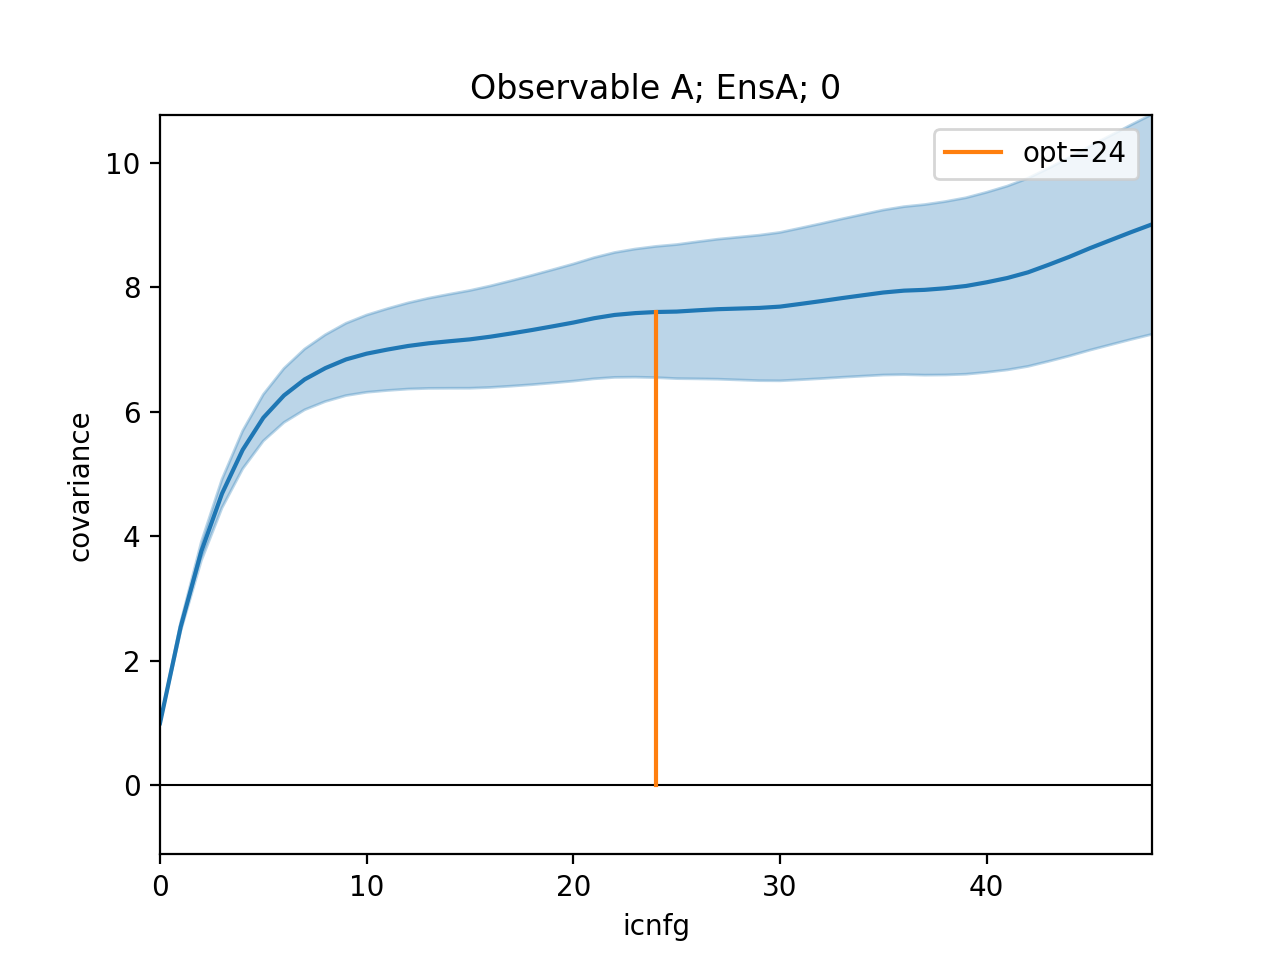

In [5]:
print(obsA) # this is equivalent to obsA.error()
[a,da] = obsA.error(plot=True) # note that a, da are numpy arrays

## A second observable

We generate a second observable that we imagine from a different ensemble. 

<IPython.core.display.Javascript object>


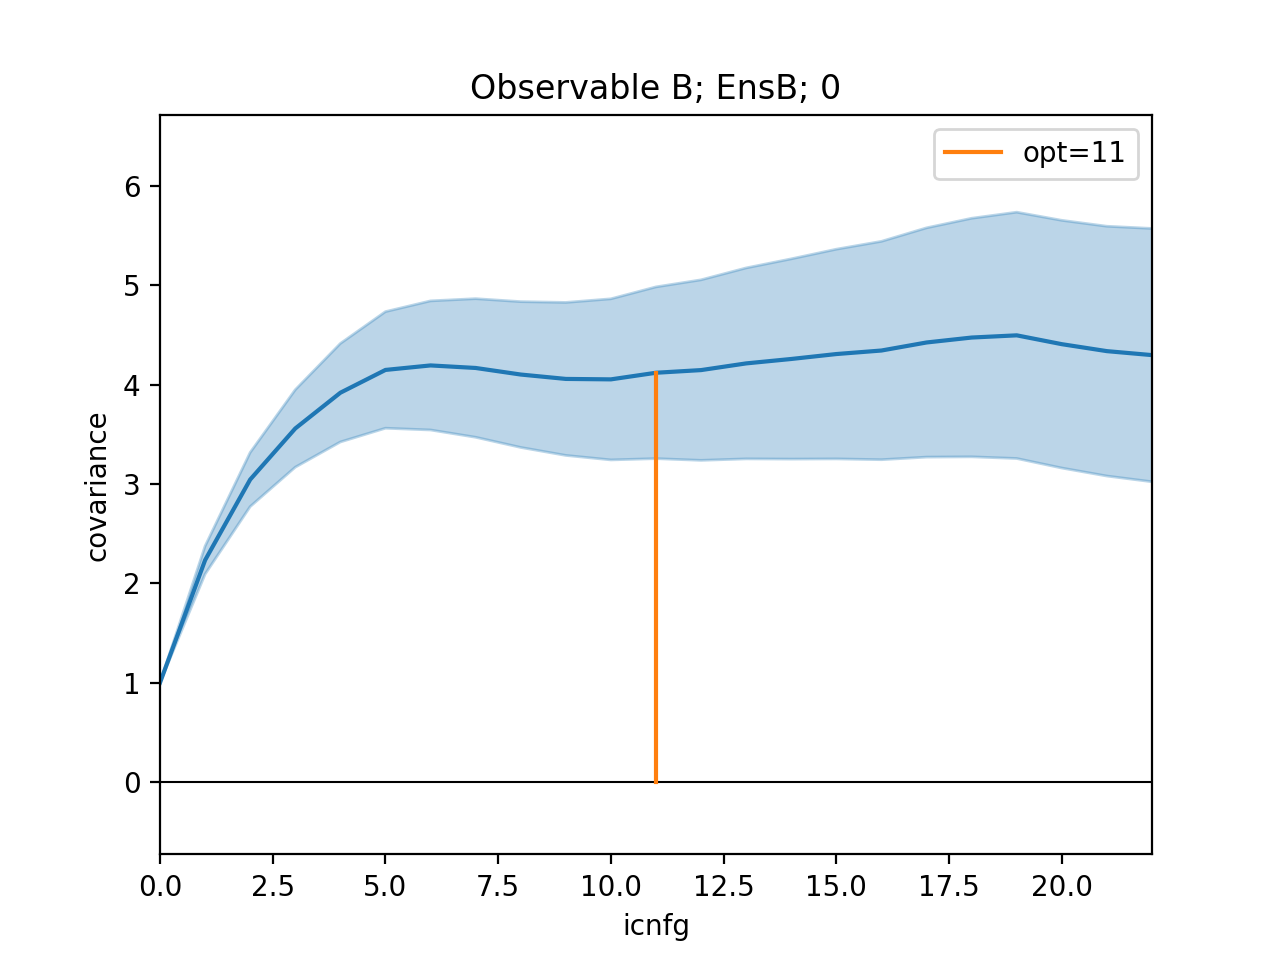

In [6]:
N=1000 # number of configs
mu = -2.5 # central values
cov = (mu*0.2)**2 # error^2

# autocorrelation time
tau=2.0

data = pyobs.random.acrand(mu,cov,tau,N)

obsB = pyobs.observable(description='Observable B')
obsB.create('EnsB',data)
obsB.error(plot=True);

When we perform an operation that combines the two observables together the fluctuations of both are properly propagated in the final result. When we use the `plot=True` argument, the contributions of the various ensembles to `obsC` are automatically plotted.

<IPython.core.display.Javascript object>


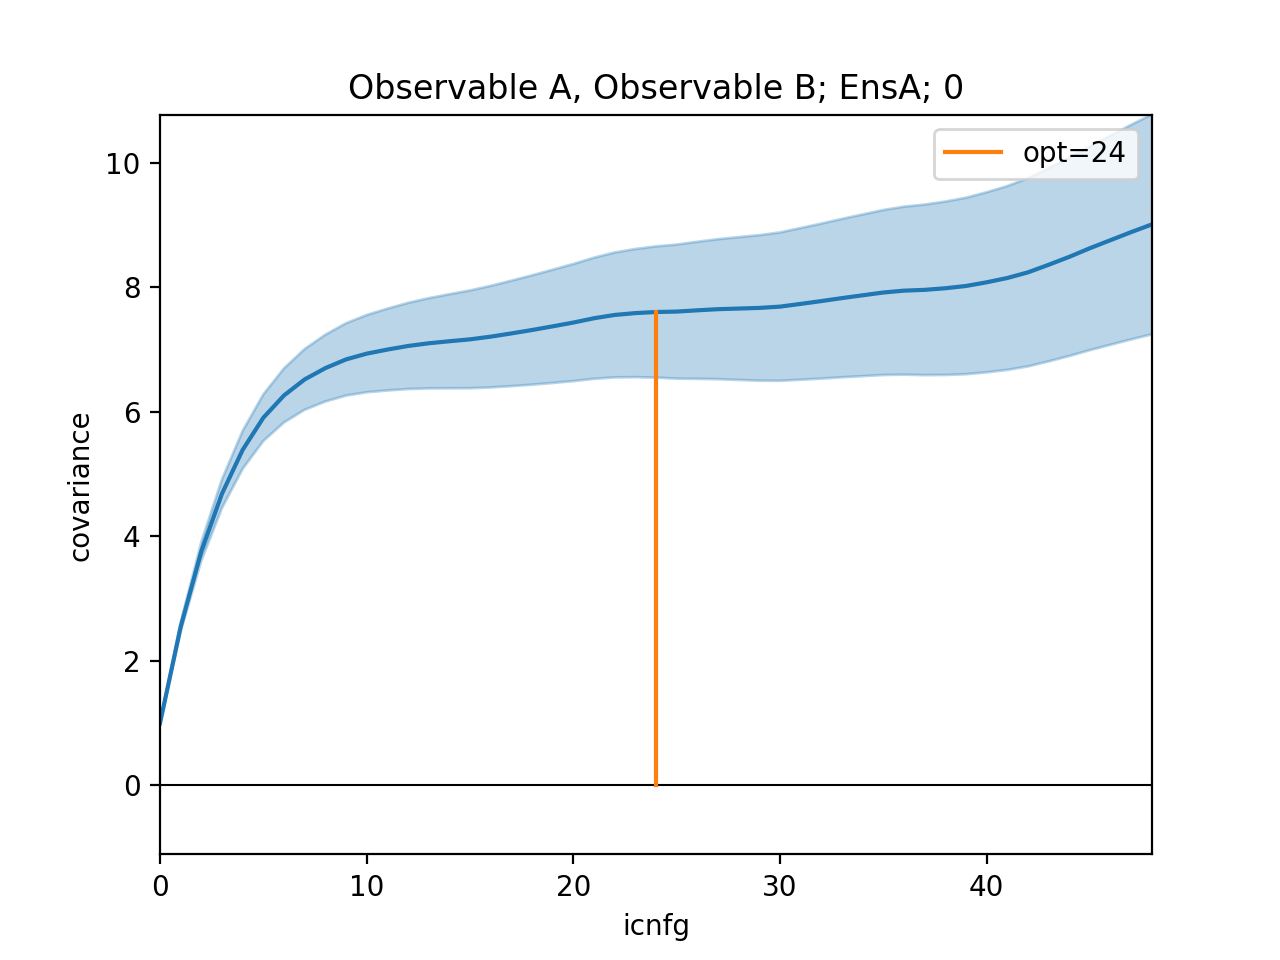

<IPython.core.display.Javascript object>


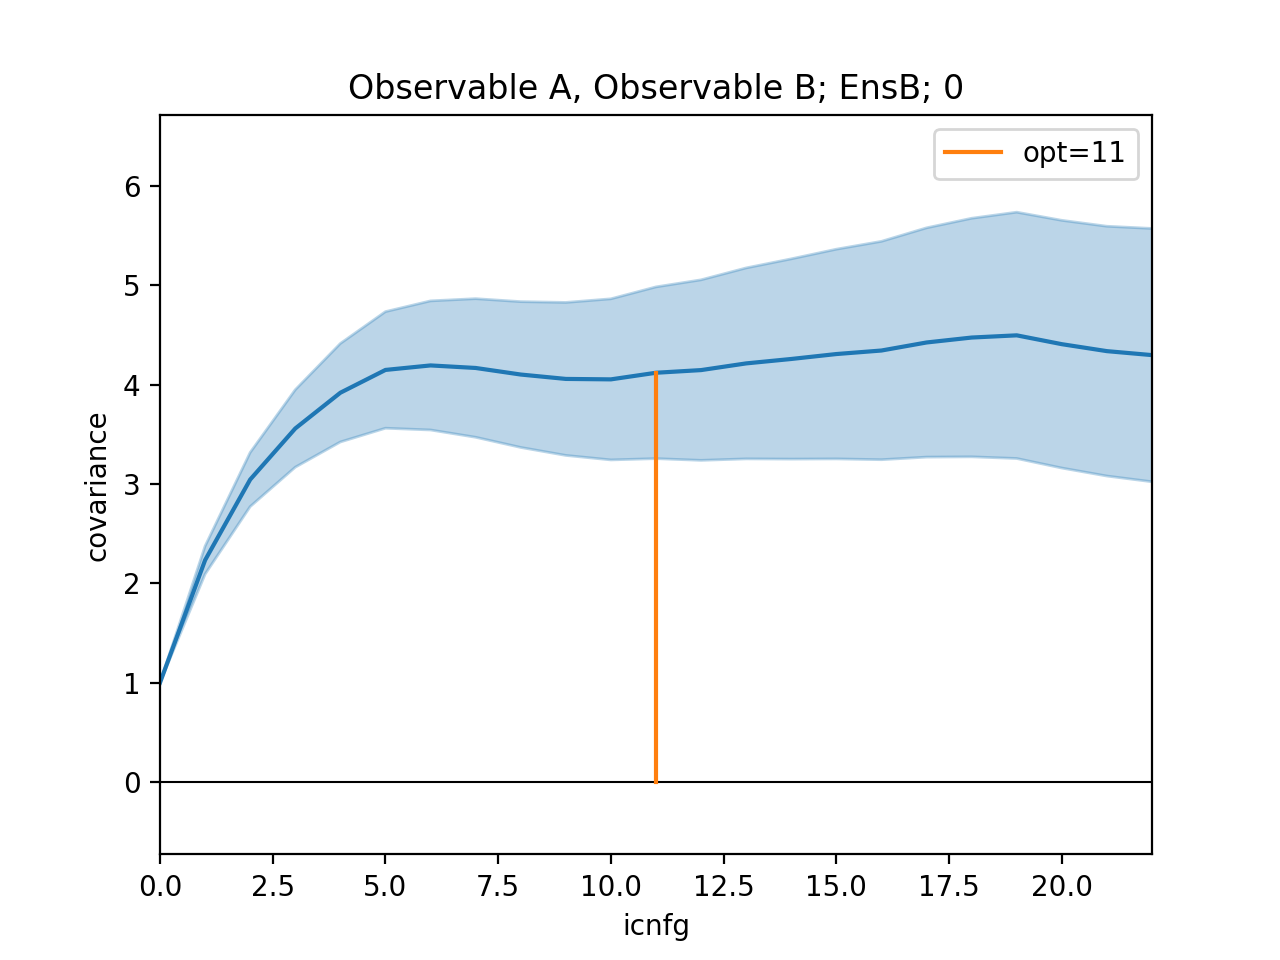

<IPython.core.display.Javascript object>


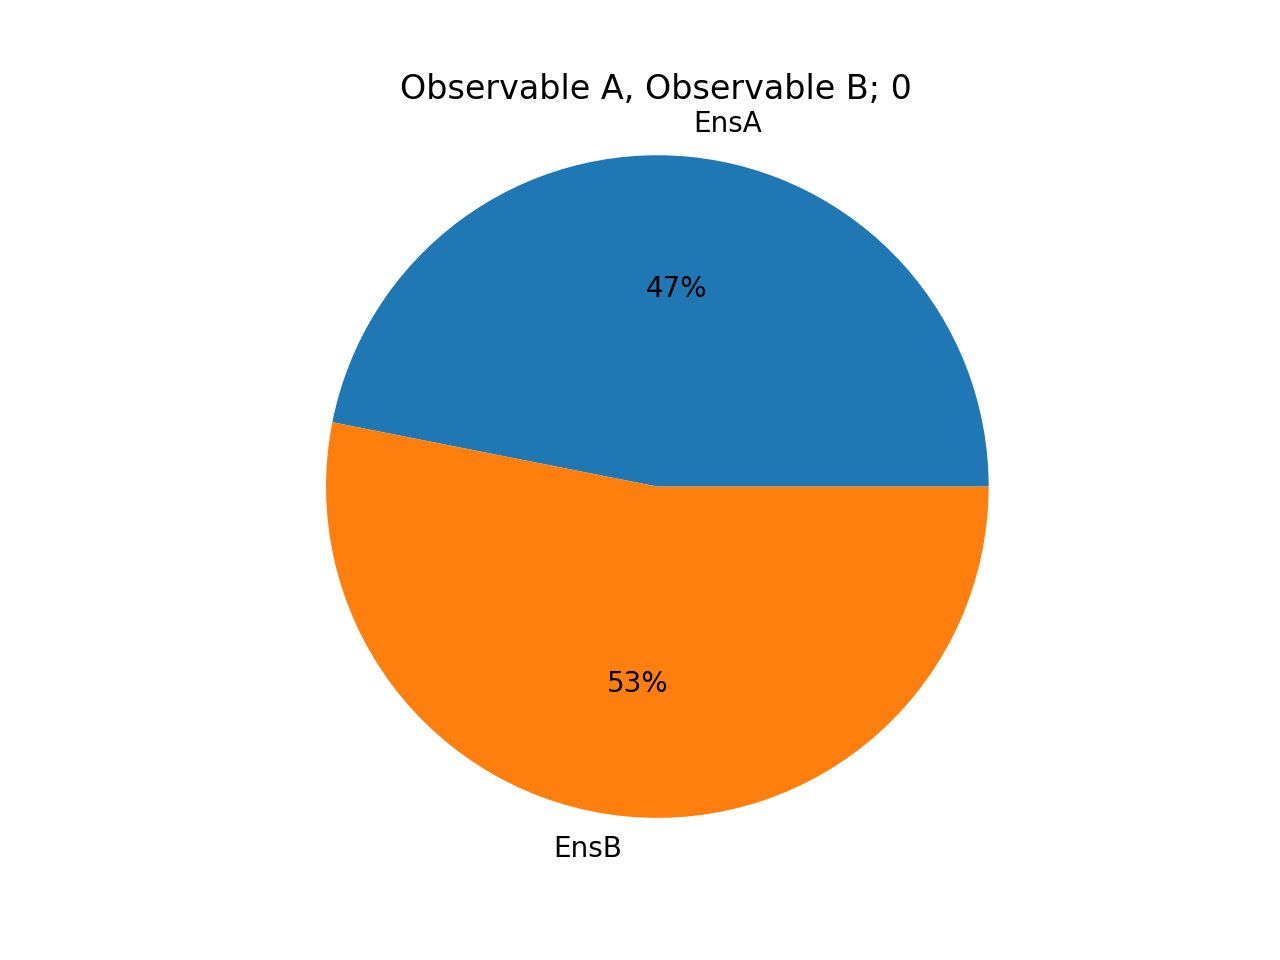

In [7]:
obsC = obsA  + 1./obsB
obsC.error(plot=True);